In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

greeks=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
sample_sub=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
test=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
train=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')

<Axes: >

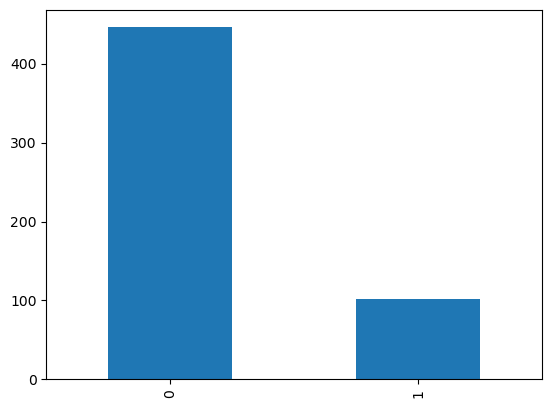

In [2]:
train_drop=train.dropna(axis=0)
train_drop.Class.value_counts().plot(kind='bar')

In [3]:
train_drop.Class.value_counts()

0    446
1    102
Name: Class, dtype: int64

In [4]:
train.Class.value_counts()

0    509
1    108
Name: Class, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
pre=LabelEncoder()
train_drop['EJ']=pre.fit_transform(train_drop['EJ'])
zero=train_drop[train_drop.Class==0].reset_index(drop=True)
one=train_drop[train_drop.Class==1].reset_index(drop=True)

In [6]:
test['EJ']=pre.transform(test['EJ'])

# Simply make train and test using 5:1 to 1:1

In [7]:
pred=[]
for i in range(4):
    training=pd.concat([zero.iloc[111*i:111*(i+1)],one])
    X,y=training.drop(['Id','Class'],axis=1),training.Class
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)
    # model=LGBMClassifier(random_state=42)
    model=Pipeline([('scale',StandardScaler()),
#                     ('lgbm',LGBMClassifier(random_state=42)),
#                     ('xgb',XGBClassifier(random_state=42)),
                    ('cat',CatBoostClassifier(random_state=42,verbose=False))
                   ])
    model.fit(X_train,y_train)
    print('model_score:',model.score(X_test,y_test))
    print('test_result:\n',model.predict_proba(test.drop(['Id'],axis=1)))
    print(model.predict(test.drop('Id',axis=1)))
    pred.append(model.predict_proba(test.drop(['Id'],axis=1)))

model_score: 0.9069767441860465
test_result:
 [[0.34931113 0.65068887]
 [0.34931113 0.65068887]
 [0.34931113 0.65068887]
 [0.34931113 0.65068887]
 [0.34931113 0.65068887]]
[1 1 1 1 1]
model_score: 0.9302325581395349
test_result:
 [[0.54169821 0.45830179]
 [0.54169821 0.45830179]
 [0.54169821 0.45830179]
 [0.54169821 0.45830179]
 [0.54169821 0.45830179]]
[0 0 0 0 0]
model_score: 0.9302325581395349
test_result:
 [[0.56054583 0.43945417]
 [0.56054583 0.43945417]
 [0.56054583 0.43945417]
 [0.56054583 0.43945417]
 [0.56054583 0.43945417]]
[0 0 0 0 0]
model_score: 0.8837209302325582
test_result:
 [[0.48946774 0.51053226]
 [0.48946774 0.51053226]
 [0.48946774 0.51053226]
 [0.48946774 0.51053226]
 [0.48946774 0.51053226]]
[1 1 1 1 1]


In [8]:
pred=np.array(pred)
pred=pred.sum(axis=0)/4
sub=test.iloc[:,:1]
sub['class_0']=pred[:,0]
sub['class_1']=pred[:,1]
sub

,Id,class_0,class_1
0,00eed32682bb,0.485256,0.514744
1,010ebe33f668,0.485256,0.514744
2,02fa521e1838,0.485256,0.514744
3,040e15f562a2,0.485256,0.514744
4,046e85c7cc7f,0.485256,0.514744


In [ ]:
sub.to_csv("/kaggle/working/submission.csv",index=False)